# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations:
1.No cities with >100 humidity
2.Majority of windspeeds appear to be under 10mph
3.both Lower and higher humidty % levels appear above 0 latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter}: {city}")
       
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("Data Retrieval Complete")


City not found. Skipping...
Processing Record 1: albany
Processing Record 2: vestmanna
Processing Record 3: busselton
Processing Record 4: faanui
Processing Record 5: yellowknife
Processing Record 6: gdansk
Processing Record 7: rapid valley
Processing Record 8: sitka
Processing Record 9: puerto ayora
Processing Record 10: ushuaia
Processing Record 11: hithadhoo
Processing Record 12: woodward
Processing Record 13: moundou
Processing Record 14: cidreira
Processing Record 15: cape town
Processing Record 16: butaritari
City not found. Skipping...
Processing Record 17: kodiak
Processing Record 18: hermosillo
Processing Record 19: port elizabeth
Processing Record 20: shieli
Processing Record 21: hobart
Processing Record 22: maldonado
Processing Record 23: half moon bay
Processing Record 24: santa maria
Processing Record 25: chlorakas
Processing Record 26: lebu
Processing Record 27: hilo
Processing Record 28: bluff
Processing Record 29: mataura
Processing Record 30: la ronge
Processing Record

Processing Record 240: adolfo lopez mateos
Processing Record 241: antsohihy
Processing Record 242: mandalgovi
Processing Record 243: ilulissat
Processing Record 244: naze
Processing Record 245: srednekolymsk
Processing Record 246: ballina
Processing Record 247: rio de janeiro
Processing Record 248: nakusp
Processing Record 249: sao joao da barra
City not found. Skipping...
Processing Record 250: banda aceh
Processing Record 251: taguatinga
Processing Record 252: longyearbyen
Processing Record 253: verkhnyaya inta
Processing Record 254: luganville
Processing Record 255: kushmurun
City not found. Skipping...
Processing Record 256: salalah
Processing Record 257: corum
Processing Record 258: takaungu
Processing Record 259: asau
Processing Record 260: ancud
Processing Record 261: walvis bay
Processing Record 262: conakry
Processing Record 263: tautira
Processing Record 264: turayf
Processing Record 265: ribeira grande
Processing Record 266: victor harbor
Processing Record 267: makakilo city

Processing Record 474: nizhneangarsk
Processing Record 475: hambantota
Processing Record 476: hun
Processing Record 477: waipawa
Processing Record 478: lenoir
Processing Record 479: marigot
Processing Record 480: puqi
City not found. Skipping...
Processing Record 481: turukhansk
Processing Record 482: lukulu
Processing Record 483: coquimbo
Processing Record 484: tarancon
Processing Record 485: beringovskiy
Processing Record 486: camacha
Processing Record 487: tornio
Processing Record 488: ippy
Processing Record 489: port-gentil
Processing Record 490: constitucion
Processing Record 491: kirkwood
Processing Record 492: wichita falls
Processing Record 493: wer
Processing Record 494: launceston
Processing Record 495: upata
Processing Record 496: santa vitoria do palmar
Processing Record 497: copiapo
Processing Record 498: xichang
Processing Record 499: diban
Processing Record 500: chirongui
Processing Record 501: pangnirtung
Processing Record 502: kruisfontein
Processing Record 503: molina

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = pd.DataFrame({
    "City" : city_name_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list,})

weather_dict.to_csv('weather_data.csv')

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,48.00,70,99,3.85,US,1618703199
1,Vestmanna,62.1564,-7.1664,46.40,81,100,26.46,FO,1618703590
2,Busselton,-33.6500,115.3333,62.28,69,0,7.07,AU,1618703590
3,Faanui,-16.4833,-151.7500,82.35,73,79,8.72,PF,1618703591
4,Yellowknife,62.4560,-114.3525,35.60,64,75,10.36,CA,1618703288
...,...,...,...,...,...,...,...,...,...
561,Fare,-16.7000,-151.0167,82.11,73,8,8.70,PF,1618703612
562,Gainesville,29.6516,-82.3248,75.20,73,75,6.91,US,1618703776
563,Kolokani,13.5728,-8.0339,83.68,44,85,7.09,ML,1618703776
564,São Miguel do Araguaia,-13.2750,-50.1628,74.16,82,98,0.43,BR,1618703776


In [6]:
#homework instructions didnt say to create script for this but there was an image placeholder
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,20.360800,18.166861,58.590742,68.208481,53.657244,7.593304,1.618704e+09
std,33.896216,88.804134,21.416127,22.800303,38.369270,5.020832,1.232918e+02
min,-54.800000,-179.166700,-20.580000,6.000000,0.000000,0.290000,1.618703e+09
25%,-8.089225,-60.285050,45.000000,57.250000,13.000000,3.780000,1.618704e+09
50%,25.636650,23.931400,62.345000,73.000000,65.000000,6.800000,1.618704e+09
75%,48.717750,92.579175,77.000000,86.000000,90.000000,10.360000,1.618704e+09
max,78.218600,179.316700,91.400000,100.000000,100.000000,28.630000,1.618704e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

#***SKIP***-No data in above chart showing humidity >100 (max is at 100, but not greater)

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#***SKIP***-No data in above chart showing humidity >100 (max is at 100, but not greater)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

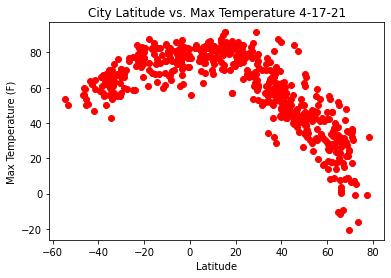

In [24]:
plt.title("City Latitude vs. Max Temperature 4-17-21")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], color = "red")

plt.savefig("LatitudeTemperature.png")
plt.show()

## Latitude vs. Humidity Plot

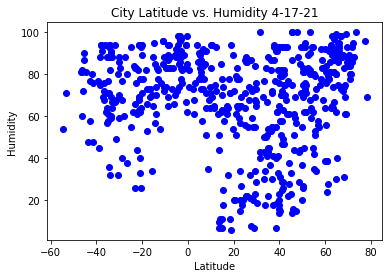

In [25]:
plt.title("City Latitude vs. Humidity 4-17-21")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"],color = "blue")

plt.savefig("LatitudeHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

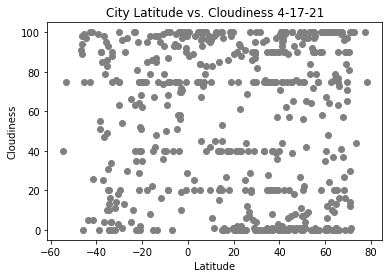

In [26]:
plt.title("City Latitude vs. Cloudiness 4-17-21")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"],color = "gray")

plt.savefig("LatitudeCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

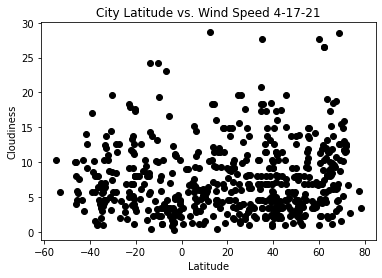

In [27]:
plt.title("City Latitude vs. Wind Speed 4-17-21")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"],color = "black")

plt.savefig("LatitudeWindSpeed.png")
plt.show()

## Linear Regression

In [28]:
#create data
x_values = weather_data['Lat']
yt_values = weather_data['Max Temp']
yh_values = weather_data['Humidity']
yc_values = weather_data['Cloudiness']
yw_values = weather_data['Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

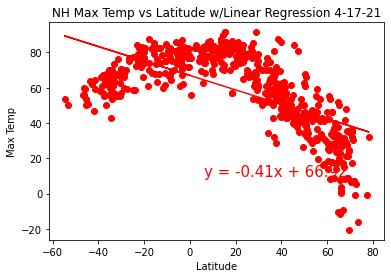

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, yt_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("NH Max Temp vs Latitude w/Linear Regression 4-17-21")
plt.scatter(x_values,yt_values, color = "red")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("LatitudeTempNHLinear.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

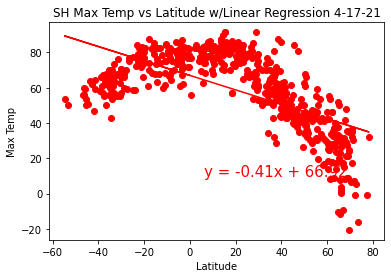

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, yt_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("SH Max Temp vs Latitude w/Linear Regression 4-17-21")
plt.scatter(x_values,yt_values, color = "red")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("LatitudeTempSHLinear.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

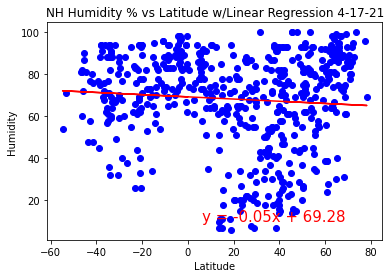

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, yh_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("NH Humidity % vs Latitude w/Linear Regression 4-17-21")
plt.scatter(x_values,yh_values, color = "blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("LatitudeHumidityNHLinear.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

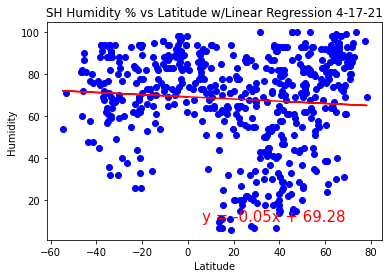

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, yh_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("SH Humidity % vs Latitude w/Linear Regression 4-17-21")
plt.scatter(x_values,yh_values, color = "blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("LatitudeHumiditySHLinear.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

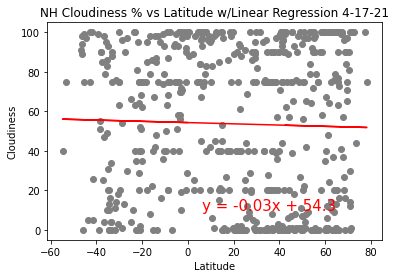

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, yc_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("NH Cloudiness % vs Latitude w/Linear Regression 4-17-21")
plt.scatter(x_values,yc_values, color = "gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("LatitudeCloudinessNHLinear.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

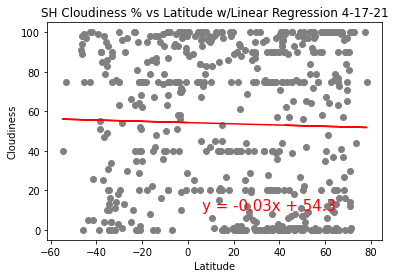

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, yc_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("SH Cloudiness % vs Latitude w/Linear Regression 4-17-21")
plt.scatter(x_values,yc_values, color = "gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("LatitudeCloudinessSHLinear.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

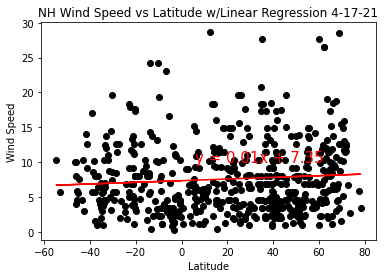

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, yw_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("NH Wind Speed vs Latitude w/Linear Regression 4-17-21")
plt.scatter(x_values,yw_values, color = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("LatitudeWindspeedNHLinear.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

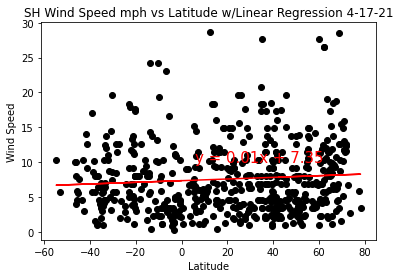

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, yw_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("SH Wind Speed mph vs Latitude w/Linear Regression 4-17-21")
plt.scatter(x_values,yw_values, color = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("LatitudeWindspeedSHLinear.png")
plt.show()